In [1]:
# default_exp solar

# Solar System Generation

Based on [this tutorial](https://www.youtube.com/watch?v=XSgerkCVbFc&ab_channel=TheBuffED)

<br>

### Imports

In [2]:
#exports
import cairo
from cairosvg import svg2png

import math
import random

import PIL
from PIL.PngImagePlugin import PngImageFile
from io import BytesIO

In [3]:
from IPython.display import SVG, JSON, Image

<br>

### User Configuration

In [4]:
user_config = {
    'width': 500,
    'height': 300,
    'border_size': 10,
    'sun_size': 50,
    'min_planet_size': 3,
    'max_planet_size': 10,
    'distance_between_planets': 10,
    'planet_path': 'orbit',
    'noise': 0.1,
    'dpi': 250
}

<br>

### Graphic Construction Helpers

In [20]:
#exports
def vis_graphic(img):
    img_type_to_display = {
        PngImageFile: display, 
        BytesIO: lambda img: SVG(data=img.getvalue())
    }
    
    return img_type_to_display[type(img)](img)

def draw_img(draw_ops, user_config):
    svgio = BytesIO()

    with cairo.SVGSurface(svgio, user_config['width'], user_config['height']) as surface:
        context = cairo.Context(surface)

        for (draw_func, draw_args) in draw_ops:
            globals()[draw_func](context, **{arg: user_config[arg] for arg in draw_args})
            
    return svgio

In [21]:
#exports
def select_new_colour(old_colour=(145, 185, 141)):
    list_of_colors = [(145, 185, 141), (229, 192, 121), (210, 191, 88), (140, 190, 178), (189, 190, 220),
                      (221, 79, 91), (16, 182, 98), (227, 146, 80), (241, 133, 123), (110, 197, 233), (235, 205, 188), (197, 239, 247), 
                      (190, 144, 212), (41, 241, 195), (101, 198, 187), (255, 246, 143), (189, 195, 199), (243, 241, 239)]
    
    new_colour = random.choice(list_of_colors)

    if old_colour is not None:
        while (new_colour is old_colour):
            new_colour = random.choice(list_of_colors)

    r, g, b = new_colour[0]/255.0, new_colour[1]/255.0, new_colour[2]/255.0
    
    return r, g, b

<br>

### Graphic Components

#### Background

In [22]:
#exports
def draw_background(context, width, height, r=.3, g=.3, b=.3):
    context.set_source_rgb(r, g, b)
    context.rectangle(0, 0, width, height)
    context.fill()

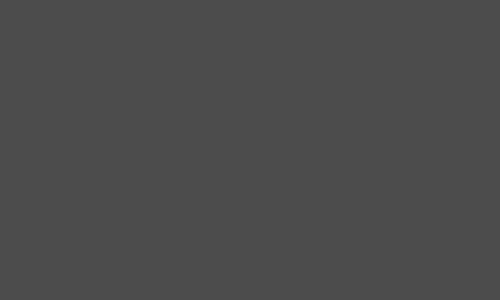

In [23]:
draw_ops = list()

draw_ops += [('draw_background', ['width', 'height'])]
svgio = draw_img(draw_ops, user_config)

vis_graphic(svgio)

<br>

#### Sun

In [9]:
#exports
def draw_circle_fill(context, x, y, radius, r, g, b):
    context.set_source_rgb(r, g, b)
    context.arc(x, y, radius, 0, 2*math.pi)
    context.fill()
    
def draw_sun(context, width, height, border_size, sun_size, sun_r=243/255, sun_g=156/255, sun_b=18/255):
    sun_center = height - border_size
    draw_circle_fill(context, width/2, sun_center, sun_size, sun_r, sun_g, sun_b)

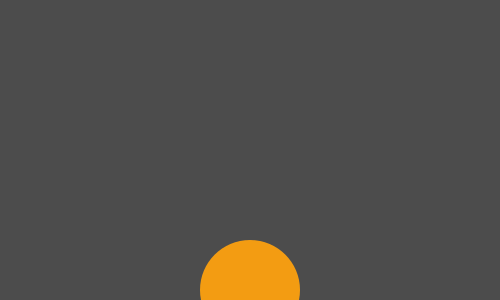

In [24]:
draw_ops += [('draw_sun', ['width', 'height', 'border_size', 'sun_size'])]
svgio = draw_img(draw_ops, user_config)

vis_graphic(svgio)

<br>

#### Planets

In [11]:
#exports
def draw_orbit(context, x, y, radius, r, g, b, line_width=1):
    context.set_source_rgb(r, g, b)
    context.set_line_width(line_width)
    context.arc(x, y, radius, 0, 2*math.pi)
    context.stroke()
    
def draw_line(context, width, border_size, next_center, r, g, b, line_width=1):
    context.set_source_rgb(r, g, b)
    context.set_line_width(line_width)
    context.move_to(border_size * 2, next_center)
    context.line_to(width-(border_size*2), next_center)
    context.stroke()
    
def get_planet_size_center(last_center, last_size, distance_between_planets, min_planet_size=5, max_planet_size=70):
    next_size = random.randint(min_planet_size, max_planet_size)
    next_center = last_center - last_size - (next_size * 2) - distance_between_planets
    
    return next_size, next_center

def draw_planets(context, width, height, border_size, sun_size, distance_between_planets, min_planet_size, max_planet_size, planet_path='orbit', old_colour=None):
    last_center = sun_center = height - border_size
    last_size = sun_size

    for x in range(1, 20):
        next_size, next_center = get_planet_size_center(last_center, last_size, 
                                                        distance_between_planets, 
                                                        min_planet_size, max_planet_size)

        reached_border = (next_center - next_size) < border_size

        if not reached_border:
            # Drawing the planet paths
            r, g, b = select_new_colour(old_colour)
            
            if planet_path == 'orbit': 
                draw_orbit(context, width/2, sun_center, height - next_center - border_size, r, g, b),
            elif planet_path == 'line': 
                draw_line(context, width, border_size, next_center, r, g, b)
            
            # Drawing the planet
            r, g, b = select_new_colour(old_colour)
            draw_circle_fill(context, width/2, next_center, next_size, r, g, b)

            # Preparing params for next planet
            last_center = next_center
            last_size = next_size

            min_planet_size += 5
            max_planet_size += 5 * x

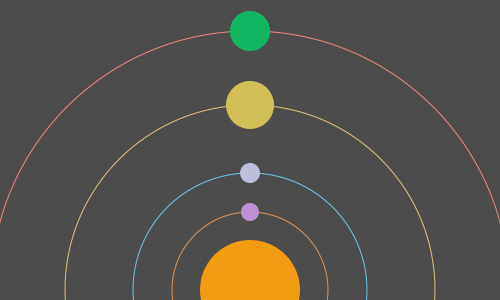

In [12]:
draw_ops['draw_planets'] = ['width', 'height', 'border_size', 'sun_size', 'distance_between_planets', 'min_planet_size', 'max_planet_size', 'planet_path']
svgio = draw_img(draw_ops, user_config)

vis_graphic(svgio)

<br>

#### Border

In [13]:
#exports
def draw_border(context, border_size, width, height, bkg_r=243/255, bkg_g=156/255, bkg_b=18/255):
    context.set_source_rgb(bkg_r, bkg_g, bkg_b)
    context.rectangle(0, 0, border_size, height)
    context.rectangle(0, 0, width, border_size)
    context.rectangle(0, height-border_size, width, border_size)
    context.rectangle(width-border_size, 0, border_size, height)
    context.fill()

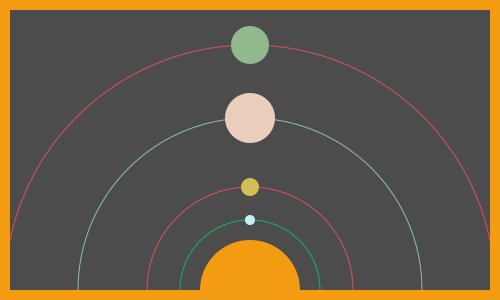

In [14]:
draw_ops['draw_border'] = ['border_size', 'width', 'height']
svgio = draw_img(draw_ops, user_config)

vis_graphic(svgio)

<br>

### Adding Noise

In [15]:
#exports
def add_noise(svgio, user_config):
    with BytesIO() as f:
        # Writing the svg data as a png to file object
        svg2png(bytestring=svgio.getvalue(), write_to=f, dpi=user_config['dpi'])

        # Reading the file object with PIL and loading the pixels
        img = PIL.Image.open(f, 'r')
        pixels = img.load()

        # Adding noise to the image
        float_gen = lambda a, b: random.uniform(a, b)
        global_noise = user_config['noise']

        for i in range(img.size[0]):
            for j in range(img.size[1]):
                r, g, b = pixels[i, j]

                local_noise = float_gen(1.0 - global_noise, 1.0 + global_noise)
                pixels[i, j] = (int(r*local_noise), int(g*local_noise), int(b*local_noise))

    return img

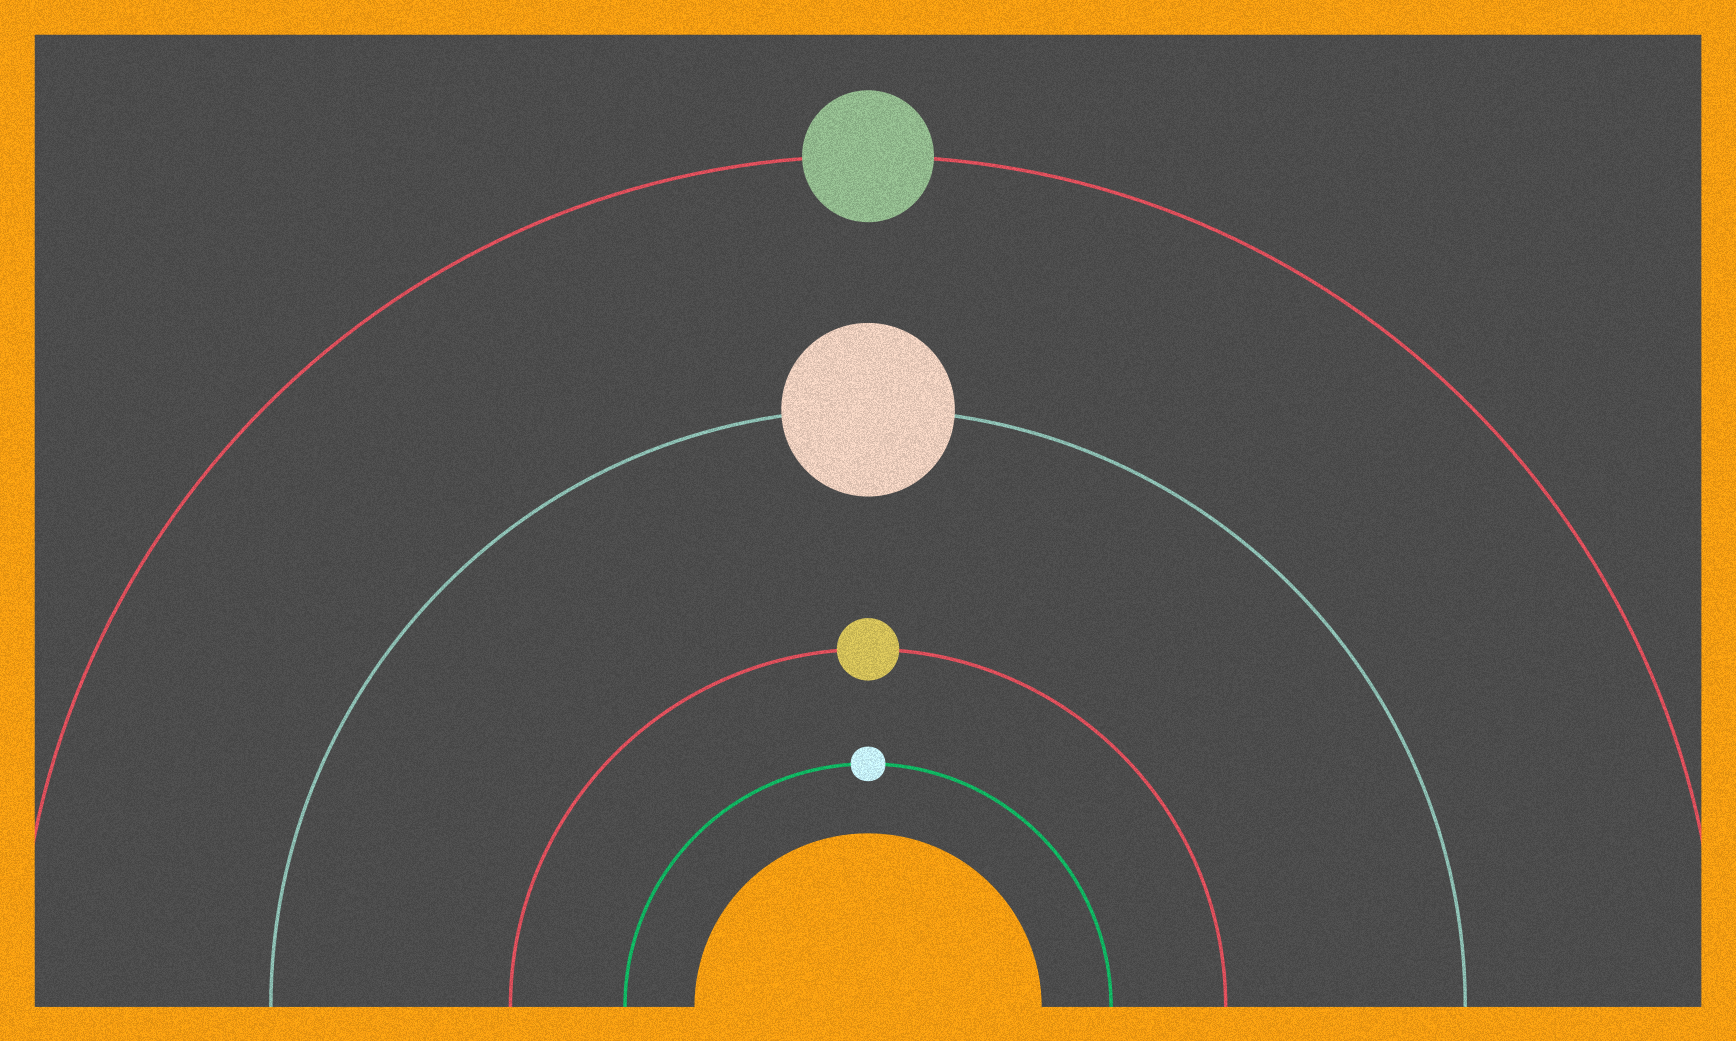

In [18]:
img = add_noise(svgio, user_config)
vis_graphic(img)

In [17]:
#hide
from nbdev.export import *
notebook2script()

Converted 01-solar-system.ipynb.
